In [3]:
!tar -xvf "./languageID.tar"   #[run this cell to extract tar files]

languageID/
languageID/e0.txt
languageID/e10.txt
languageID/e11.txt
languageID/e12.txt
languageID/e13.txt
languageID/e14.txt
languageID/e15.txt
languageID/e16.txt
languageID/e17.txt
languageID/e18.txt
languageID/e19.txt
languageID/e1.txt
languageID/e2.txt
languageID/e3.txt
languageID/e4.txt
languageID/e5.txt
languageID/e6.txt
languageID/e7.txt
languageID/e8.txt
languageID/e9.txt
languageID/j0.txt
languageID/j10.txt
languageID/j11.txt
languageID/j12.txt
languageID/j13.txt
languageID/j14.txt
languageID/j15.txt
languageID/j16.txt
languageID/j17.txt
languageID/j18.txt
languageID/j19.txt
languageID/j1.txt
languageID/j2.txt
languageID/j3.txt
languageID/j4.txt
languageID/j5.txt
languageID/j6.txt
languageID/j7.txt
languageID/j8.txt
languageID/j9.txt
languageID/s0.txt
languageID/s1.txt
languageID/s10.txt
languageID/s11.txt
languageID/s12.txt
languageID/s13.txt
languageID/s14.txt
languageID/s15.txt
languageID/s16.txt
languageID/s17.txt
languageID/s18.txt
languageID/s19.txt
languageID/s2.txt
lang

In [4]:
import os, re
os.chdir("./languageID")

Pre-process

In [5]:
files = os.listdir()
# etrain_pattern = r"e[0-9]\.txt*"
# jtrain_pattern = r"j[0-9]\.txt*"
# strain_pattern = r"s[0-9]\.txt*"
train_pattern = r".[0-9]\.txt"
train = [f for f in files if re.match(train_pattern, f)]

# train_e = [f for f in files if re.match(etrain_pattern, f)]
# train_j = [f for f in files if re.match(jtrain_pattern, f)]
# train_s = [f for f in files if re.match(strain_pattern, f)]

train

['s2.txt',
 'j3.txt',
 'j1.txt',
 's7.txt',
 'j4.txt',
 'e1.txt',
 's4.txt',
 'e5.txt',
 'j7.txt',
 'j6.txt',
 'j2.txt',
 's9.txt',
 's8.txt',
 'j5.txt',
 'e4.txt',
 'e8.txt',
 'e7.txt',
 's1.txt',
 'e0.txt',
 'j8.txt',
 'j9.txt',
 's5.txt',
 'e3.txt',
 's3.txt',
 'e9.txt',
 's0.txt',
 'j0.txt',
 's6.txt',
 'e2.txt',
 'e6.txt']

In [6]:
import pandas as pd
import numpy as np
from collections import Counter

In [7]:
train_df = pd.DataFrame(columns = ["file", "lang","content"])
for tr in train:
  with open(tr,"r") as f:
    #file_str = f.read().replace("\W", " ")
    file_str = f.read().replace("\n","")
  train_df = train_df.append({"file":tr,
                              "lang": tr[0],
                              "content":file_str},
                             ignore_index=True)
train_df.head()
#train_df["content"] = train_df["content"].str.split()

<ipython-input-7-27eb83d3b2a3>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({"file":tr,
<ipython-input-7-27eb83d3b2a3>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({"file":tr,
<ipython-input-7-27eb83d3b2a3>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({"file":tr,
<ipython-input-7-27eb83d3b2a3>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({"file":tr,
<ipython-input-7-27eb83d3b2a3>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

,file,lang,content
0,s2.txt,s,tricolor mexicanoel autogol desato la locura e...
1,j3.txt,j,saku kotowa nainoyukkurito hora asahiga nobott...
2,j1.txt,j,anatawo tsuresaru ano hitoga garasuno youni k...
3,s7.txt,s,llevarse el credito por el trabajo de otra pe...
4,j4.txt,j,sono kaoriwa bokuno kiokuto itsumo isshodeomo...


In [8]:
vocab = [chr(char_code) for char_code in range(97, 123)] + [' ']
vocab_str = "".join(vocab)
print(vocab_str)

def tokenize(sent):
  ch_counts = dict(Counter(char for char in sent if char in vocab_str))
  ch_counts_list = [ch_counts.get(char, 0) for char in vocab_str]
  return ch_counts_list
#tokenize(train_df.loc[0,"content"])

abcdefghijklmnopqrstuvwxyz 


In [9]:
train_df["tokenized"] = train_df["content"].apply(tokenize)
train_df[vocab] = pd.DataFrame(
    train_df["tokenized"].tolist(),
    index=train_df.index)

train_df.drop("tokenized",axis=1,inplace=True)
train_df.head()

,file,lang,content,a,b,c,d,e,f,g,...,r,s,t,u,v,w,x,y,z,
0,s2.txt,s,tricolor mexicanoel autogol desato la locura e...,228,23,79,59,219,16,20,...,111,121,77,68,9,0,6,16,2,328
1,j3.txt,j,saku kotowa nainoyukkurito hora asahiga nobott...,132,13,6,13,52,3,17,...,44,47,62,74,0,22,0,14,5,136
2,j1.txt,j,anatawo tsuresaru ano hitoga garasuno youni k...,192,13,13,20,95,5,19,...,83,61,88,118,0,28,0,25,11,186
3,s7.txt,s,llevarse el credito por el trabajo de otra pe...,139,8,48,59,151,14,5,...,69,89,52,34,6,0,5,8,2,211
4,j4.txt,j,sono kaoriwa bokuno kiokuto itsumo isshodeomo...,175,14,9,22,75,6,19,...,47,63,82,97,0,29,0,17,13,166


NB Model

In [10]:
#(1)
def prior_prob(df,alpha,printPr=False):
  prior = df.groupby("lang").apply(lambda x: (len(x) + alpha)/(len(df) + alpha*len(x)))
  if printPr:
    print("Prior probabilities: ", prior)
  return dict(zip(["e","j","s"],np.log(prior).values))#np.log(prior).values

prior_dict = prior_prob(train_df,1/2,printPr=True)
prior_dict

Prior probabilities:  lang
e    0.3
j    0.3
s    0.3
dtype: float64


{'e': -1.2039728043259361, 'j': -1.2039728043259361, 's': -1.2039728043259361}

In [11]:
# lang_df = train_df[train_df["lang"] == "e"]
# cond_prob = lang_df.loc[:,"a":].sum()/lang_df.loc[:,"a":].sum().sum() #sum: sums over each column
# cond_prob

In [12]:
#(2)Class Cond for English
def class_cond_prob(df,alpha, lang):
  lang_df = df.loc[df["lang"] == lang,:]
  cond_prob = (lang_df.loc[:,"a":].sum() + alpha)/(lang_df.loc[:,"a":].sum().sum() + alpha*27)
  print(cond_prob)
  return np.log(cond_prob)

log_cond_prob_e = class_cond_prob(train_df,1/2,"e")
likelihood_e = np.prod(log_cond_prob_e)

a    0.060169
b    0.011135
c    0.021510
d    0.021973
e    0.105369
f    0.018933
g    0.017479
h    0.047216
i    0.055411
j    0.001421
k    0.003734
l    0.028977
m    0.020519
n    0.057922
o    0.064464
p    0.016752
q    0.000562
r    0.053825
s    0.066182
t    0.080126
u    0.026664
v    0.009285
w    0.015496
x    0.001156
y    0.013844
z    0.000628
     0.179250
dtype: float64


In [13]:
#(3) Class cond for Jap, Sp
print("Japanese")
log_cond_prob_j = class_cond_prob(train_df,1/2,"j")
likelihood_j = np.prod(log_cond_prob_j)
print("Spanish")
log_cond_prob_s = class_cond_prob(train_df,1/2,"s")
likelihood_s = np.prod(log_cond_prob_s)

Japanese
a    0.131766
b    0.010867
c    0.005486
d    0.017226
e    0.060205
f    0.003879
g    0.014012
h    0.031762
i    0.097033
j    0.002341
k    0.057409
l    0.001433
m    0.039799
n    0.056711
o    0.091163
p    0.000874
q    0.000105
r    0.042804
s    0.042175
t    0.056990
u    0.070617
v    0.000245
w    0.019742
x    0.000035
y    0.014151
z    0.007722
     0.123449
dtype: float64
Spanish
a    0.104560
b    0.008233
c    0.037526
d    0.039746
e    0.113811
f    0.008603
g    0.007184
h    0.004533
i    0.049860
j    0.006629
k    0.000278
l    0.052943
m    0.025809
n    0.054177
o    0.072492
p    0.024267
q    0.007678
r    0.059295
s    0.065770
t    0.035614
u    0.033702
v    0.005889
w    0.000093
x    0.002498
y    0.007863
z    0.002683
     0.168265
dtype: float64


In [14]:
#(4)
test4 = "e10.txt"
print(f"BOW vector for {test4}")
with open(test4,"r") as f:
    test4_str = f.read().replace("\n","")
bow4 = tokenize(test4_str)
bow4
#all characters appear?

BOW vector for e10.txt


[164,
 32,
 53,
 57,
 311,
 55,
 51,
 140,
 140,
 3,
 6,
 85,
 64,
 139,
 182,
 53,
 3,
 141,
 186,
 225,
 65,
 31,
 47,
 4,
 38,
 2,
 498]

In [26]:
#(5) estimated likelihood
#TODO: are these exact same as likelihood?
def pred_class_cond_prob(x_bow,alpha,lang,printEach=False):
  lang_df = train_df.loc[train_df["lang"] == lang,:]
  # zero_idx = np.where(x_bow==0)[0] - 1 #np: get indices where ch is not present in x
  temp_df = lang_df.loc[:,"a":]
  # temp_df = temp_df.drop(temp_df.columns[zero_idx],axis=1) #drop ch indices where ch is not present in x
  cond_prob = (temp_df.sum() + alpha)/(lang_df.loc[:,"a":].sum().sum() + alpha*27)
  # print(type(cond_prob))
  if printEach:
    print(cond_prob)
  #print(len(x_bow))
  #print(len(cond_prob))
  return np.sum(x_bow*np.log(cond_prob))

x_ll = {"e":pred_class_cond_prob(bow4,1/2,"e"),
        "j":pred_class_cond_prob(bow4,1/2,"j"),
        "s":pred_class_cond_prob(bow4,1/2,"s")}
print(x_ll)

{'e': -7841.865447060635, 'j': -8771.433079075032, 's': -8467.282044010557}


In [23]:
#(6) posterior
post_dict = {}
for l in ["e","j","s"]:
  post_dict[l] = prior_dict[l]+x_ll[l]
print(post_dict)
print("Predict argmax LL: ", max(post_dict, key=lambda k:post_dict[k]))

{'e': -7843.069419864961, 'j': -8772.637051879357, 's': -8468.486016814883}
Predict argmax LL:  e


In [17]:
def nb_classifier(bow, alpha=1/2):
  x_ll = {"e":pred_class_cond_prob(bow,alpha,"e"),
        "j":pred_class_cond_prob(bow,alpha,"j"),
        "s":pred_class_cond_prob(bow,alpha,"s")}
  post_dict = {}
  for l in ["e","j","s"]:
    post_dict[l] = prior_dict[l]+x_ll[l]
  return max(post_dict, key=lambda k:post_dict[k])

In [18]:
#test_df.head()

In [19]:
#test_df["file"]

In [20]:
#(7)
test_pattern= r"[a-z](1[0-9])\.txt"
test = [f for f in files if re.match(test_pattern, f)]
test_df = pd.DataFrame(columns = ["file", "lang","content"])
for te_i in test:
  with open(te_i,"r") as f:
    #file_str = f.read().replace("\W", " ")
    file_str = f.read().replace("\n","")
    test_df = test_df.append({"file":te_i,
                              "lang": te_i[0],
                              "content":file_str},
                             ignore_index=True)
test_df["tokenized"] = test_df["content"].apply(tokenize)
test_df[vocab] = pd.DataFrame(
    test_df["tokenized"].tolist(),
    index=test_df.index)

test_df.drop("tokenized",axis=1,inplace=True)
test_df.head()

<ipython-input-20-3e72c368e05a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({"file":te_i,
<ipython-input-20-3e72c368e05a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({"file":te_i,
<ipython-input-20-3e72c368e05a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({"file":te_i,
<ipython-input-20-3e72c368e05a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({"file":te_i,
<ipython-input-20-3e72c368e05a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

,file,lang,content,a,b,c,d,e,f,g,...,r,s,t,u,v,w,x,y,z,
0,j15.txt,j,nee saigono wagamamawo douka kiite watashino ...,166,7,6,26,82,4,19,...,52,53,81,76,0,27,0,15,7,165
1,s10.txt,s,el toro vuoso quien por primera vez salto de t...,184,22,55,75,195,7,8,...,113,107,64,50,13,0,4,4,5,279
2,e14.txt,e,circling round the earth in the same way as th...,113,24,33,32,164,38,33,...,72,109,140,36,9,23,1,19,1,322
3,s18.txt,s,fue un disparo para gol pero el toro vio como ...,218,15,75,71,183,11,13,...,108,134,66,66,16,3,6,27,6,338
4,e18.txt,e,if we could be transported in some magical way...,126,16,31,37,166,32,21,...,84,105,118,46,15,24,3,23,1,302


In [21]:
#add preds
pred_lang = test_df.loc[:,"a":].apply(nb_classifier, axis=1) #along each row
test_df.insert(2,"pred_lang", pred_lang)
test_df.head()

,file,lang,pred_lang,content,a,b,c,d,e,f,...,r,s,t,u,v,w,x,y,z,
0,j15.txt,j,j,nee saigono wagamamawo douka kiite watashino ...,166,7,6,26,82,4,...,52,53,81,76,0,27,0,15,7,165
1,s10.txt,s,s,el toro vuoso quien por primera vez salto de t...,184,22,55,75,195,7,...,113,107,64,50,13,0,4,4,5,279
2,e14.txt,e,e,circling round the earth in the same way as th...,113,24,33,32,164,38,...,72,109,140,36,9,23,1,19,1,322
3,s18.txt,s,s,fue un disparo para gol pero el toro vio como ...,218,15,75,71,183,11,...,108,134,66,66,16,3,6,27,6,338
4,e18.txt,e,e,if we could be transported in some magical way...,126,16,31,37,166,32,...,84,105,118,46,15,24,3,23,1,302


In [22]:
test_df

,file,lang,pred_lang,content,a,b,c,d,e,f,...,r,s,t,u,v,w,x,y,z,
0,j15.txt,j,j,nee saigono wagamamawo douka kiite watashino ...,166,7,6,26,82,4,...,52,53,81,76,0,27,0,15,7,165
1,s10.txt,s,s,el toro vuoso quien por primera vez salto de t...,184,22,55,75,195,7,...,113,107,64,50,13,0,4,4,5,279
2,e14.txt,e,e,circling round the earth in the same way as th...,113,24,33,32,164,38,...,72,109,140,36,9,23,1,19,1,322
3,s18.txt,s,s,fue un disparo para gol pero el toro vio como ...,218,15,75,71,183,11,...,108,134,66,66,16,3,6,27,6,338
4,e18.txt,e,e,if we could be transported in some magical way...,126,16,31,37,166,32,...,84,105,118,46,15,24,3,23,1,302
5,j12.txt,j,j,anatawo matteru mou hitotsuno aiga iyasu koton...,152,18,7,20,75,6,...,45,68,70,111,0,25,0,22,10,149
6,s12.txt,s,s,es cierto que los primeros minutos fueron de a...,202,30,59,86,222,10,...,120,141,78,88,5,0,4,12,7,341
7,e13.txt,e,e,the moon entering the shadow cast by the earth...,97,24,25,32,173,38,...,79,94,179,49,8,29,2,28,1,299
8,s14.txt,s,s,aunque los mexicanos empezaron a dominar a ten...,186,23,55,77,202,10,...,111,97,72,64,13,4,3,12,9,300
9,s15.txt,s,s,cuando michael f tuvo problemas con su servici...,142,12,62,59,179,10,...,84,94,45,60,18,0,4,7,3,265


In [ ]:
#make confusion matrix
confusion_dict = {}
langs = ["e","j","s"]
for i in langs:
  i_list = []
  for j in langs:
    i_list.append(((test_df["lang"] == i) & (test_df["pred_lang"] == j)).sum())
  #print(i_list)
  confusion_dict[i] = i_list
confusion = pd.DataFrame(confusion_dict, index=["e_hat","j_hat","s_hat"])
confusion

,e,j,s
e_hat,10,0,0
j_hat,0,10,0
s_hat,0,0,10


#####8. No, due to conditional independence assumption

##4.NN

In [28]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import datasets, transforms
from tensorflow.keras.datasets import mnist
import torchvision
from time import time
from torch import nn, optim

In [29]:
transform = transforms.Compose([transforms.ToTensor(), #convert image into numbers
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST("train.csv",download=True, train=True, transform=transform)
testset = datasets.MNIST("test.csv",download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 109174466.73it/s]


Extracting train.csv/MNIST/raw/train-images-idx3-ubyte.gz to train.csv/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 96139439.54it/s]


Extracting train.csv/MNIST/raw/train-labels-idx1-ubyte.gz to train.csv/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26867325.53it/s]


Extracting train.csv/MNIST/raw/t10k-images-idx3-ubyte.gz to train.csv/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6907370.84it/s]


Extracting train.csv/MNIST/raw/t10k-labels-idx1-ubyte.gz to train.csv/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 109649263.51it/s]

Extracting test.csv/MNIST/raw/train-images-idx3-ubyte.gz to test.csv/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 41742141.22it/s]


Extracting test.csv/MNIST/raw/train-labels-idx1-ubyte.gz to test.csv/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26579545.41it/s]


Extracting test.csv/MNIST/raw/t10k-images-idx3-ubyte.gz to test.csv/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10192899.29it/s]


Extracting test.csv/MNIST/raw/t10k-labels-idx1-ubyte.gz to test.csv/MNIST/raw



In [30]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### 4.3

In [44]:
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
input_size = 28*28 #784
d1 = 300 #hidden d1
d2 = 200 #hidden d2
k = 10 #output d
lr = 0.005

model = nn.Sequential(nn.Linear(input_size, d1),
                      nn.Sigmoid(),
                      nn.Linear(d1, k),
                      nn.Softmax(dim=1)).to(device)

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 50

trainL, testL = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images.type(torch.FloatTensor).to(device))
        labels = labels.to(device)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    # else:
    #     print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

    test_loss = 0
    for t_images, t_labels in testloader:
      ##### CE ERROR
      t_images = t_images.view(t_images.shape[0], -1)
      with torch.no_grad():
        model.eval()
        logps = model(t_images.type(torch.FloatTensor).to(device))
        t_labels = t_labels.to(device)
        test_loss += criterion(logps, t_labels).item()

      #ps = torch.exp(logps)
    trainL.append(running_loss/len(trainloader))
    testL.append(test_loss/len(testloader))

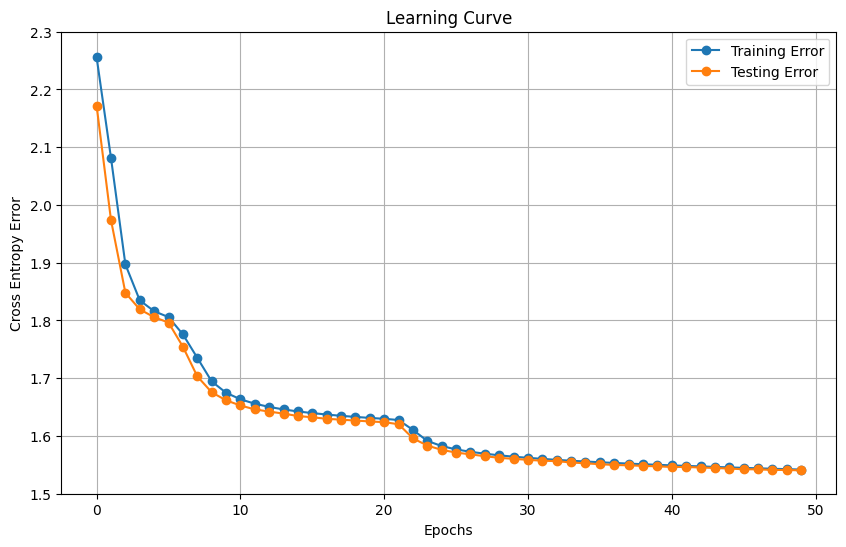

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), trainL, label='Training Error', marker='o')
plt.plot(range(epochs), testL, label='Testing Error', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Error')
plt.ylim([1.5,2.3])
plt.title('Learning Curve')
plt.legend()
plt.grid()



### 4.4
- model2: initial weights set to 0
- model3: initial weights random between [-1,1]

In [37]:
model2 = nn.Sequential(nn.Linear(input_size, d1),
                      nn.Sigmoid(),
                      nn.Linear(d1, k),
                      nn.Softmax(dim=1)).to(device)

for param in model2.parameters():
  param.data.fill_(0.0)

optimizer2 = optim.SGD(model2.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 50


trainL2, testL2 = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer2.zero_grad()

        output = model2(images.type(torch.FloatTensor).to(device))
        labels = labels.to(device)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer2.step()

        running_loss += loss.item()

    test_loss = 0
    for t_images, t_labels in testloader:
      ##### CE ERROR
      t_images = t_images.view(t_images.shape[0], -1)
      with torch.no_grad():
        model2.eval()
        logps = model2(t_images.type(torch.FloatTensor).to(device))
        t_labels = t_labels.to(device)
        test_loss += criterion(logps, t_labels).item()

      #ps = torch.exp(logps)
    trainL2.append(running_loss/len(trainloader))
    testL2.append(test_loss/len(testloader))

In [41]:
np.mean(testL2), len(testL2)

(2.183654790182782, 50)

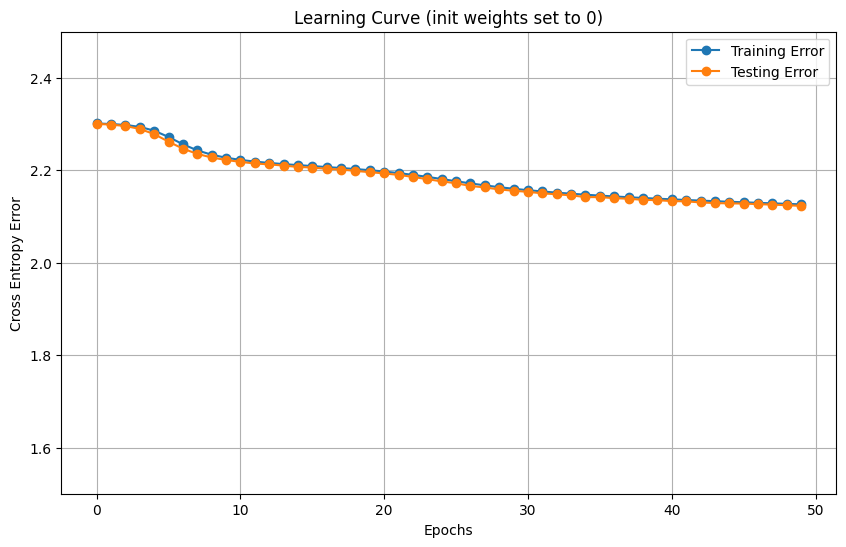

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), trainL2, label='Training Error', marker='o')
plt.plot(range(epochs), testL2, label='Testing Error', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Error')
plt.ylim([1.5,2.5])
plt.title('Learning Curve (init weights set to 0)')
plt.legend()
plt.grid()

In [47]:
model3 = nn.Sequential(nn.Linear(input_size, d1),
                      nn.Sigmoid(),
                      nn.Linear(d1, k),
                      nn.Softmax(dim=1)).to(device)

for layer in model3:
  if isinstance(layer, nn.Linear):
          nn.init.uniform_(layer.weight, a=-1, b=1)
          #print(layer.weight)

optimizer3 = optim.SGD(model3.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 50


trainL3, testL3 = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer3.zero_grad()

        output = model3(images.type(torch.FloatTensor).to(device))
        labels = labels.to(device)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer3.step()

        running_loss += loss.item()

    test_loss = 0
    for t_images, t_labels in testloader:
      ##### CE ERROR
      t_images = t_images.view(t_images.shape[0], -1)
      with torch.no_grad():
        model3.eval()
        logps = model3(t_images.type(torch.FloatTensor).to(device))
        t_labels = t_labels.to(device)
        test_loss += criterion(logps, t_labels).item()

      #ps = torch.exp(logps)
    trainL3.append(running_loss/len(trainloader))
    testL3.append(test_loss/len(testloader))

In [50]:
np.mean(testL3)

1.9227008164156774

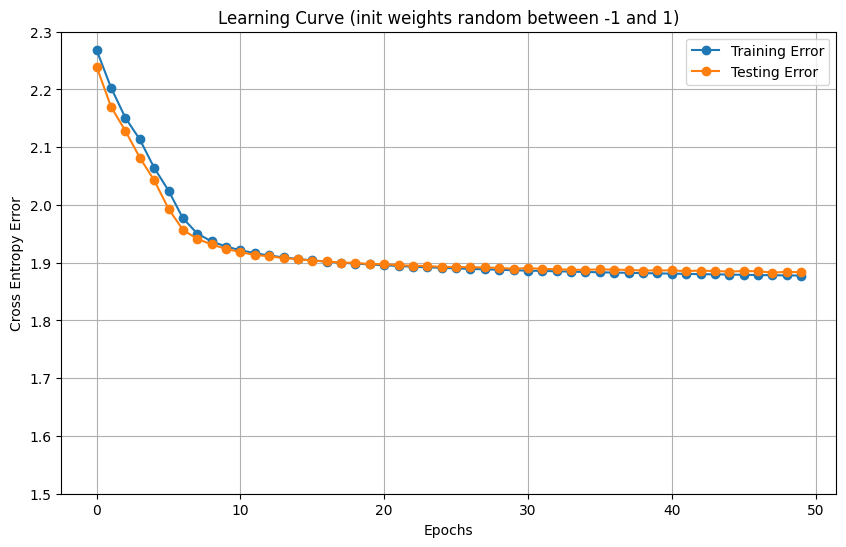

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), trainL3, label='Training Error', marker='o')
plt.plot(range(epochs), testL3, label='Testing Error', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Error')
plt.ylim([1.5,2.3])
plt.title('Learning Curve (init weights random between -1 and 1)')
plt.legend()
plt.grid()

In [ ]:
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms

input_d = 28*28 #784
d1 = 300 #hidden d1
d2 = 200 #hidden d2
k = 10 #output d
lr = 0.005


class NN(nn.Module):
  def __init__(self,input_d, d1=300, d=28, k=10):
    super().__init__()
    self.w1 = torch.randn([d1,input_d])
    self.w2 = torch.randn([k, d1])
    self.dw1 = torch.



    # self.l1 = nn.Linear(d1,d)
    # self.sigmoid = nn.Sigmoid()
    # self.l2 = nn.Linear(k,d1)
    # self.softmax = nn.Softmax(dim=1)

  def forward(self, X):
    X = self.sigmoid(self.l1(X))
    X = self.softmax(self.l2(X))
    return X


print(NN())

NN(
  (l1): Linear(in_features=300, out_features=28, bias=True)
  (sigmoid): Sigmoid()
  (l2): Linear(in_features=10, out_features=300, bias=True)
  (softmax): Softmax(dim=1)
)
